#### Importing and preprocessing the data

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pyfume.Clustering import Clusterer
from pyfume.EstimateAntecendentSet import AntecedentEstimator
from pyfume.EstimateConsequentParameters import ConsequentEstimator
from pyfume.SimpfulModelBuilder import SugenoFISBuilder
from pyfume.Tester import SugenoFISTester
from pandas import read_csv 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, explained_variance_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

data = pd.read_csv('hairdryer.csv',header=None)
indexes = ['Voltage', 'Temperature']
data.columns = indexes
indexes = indexes[:-1]

In [4]:
data.head()

,Voltage,Temperature
0,6.41,4.7661
1,3.41,4.7637
2,6.41,4.8394
3,6.41,5.0030
4,6.41,5.0176


In [5]:
data.describe()

,Voltage,Temperature
count,1000.000000,1000.000000
mean,5.000000,4.890095
std,1.498047,0.829806
min,3.410000,3.200800
25%,3.410000,4.205675
50%,6.410000,4.937050
75%,6.410000,5.652500
max,6.410000,6.250800


In [6]:
data.dtypes == float

Voltage        True
Temperature    True
dtype: bool

In [7]:
data.isnull().sum()

Voltage        0
Temperature    0
dtype: int64

In [8]:
data_x = data.drop('Temperature', axis = 1)
data_y = data.Temperature

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state=21)

data_x.shape
data_y.shape

(1000,)

In [9]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.array
y_test = y_test.array

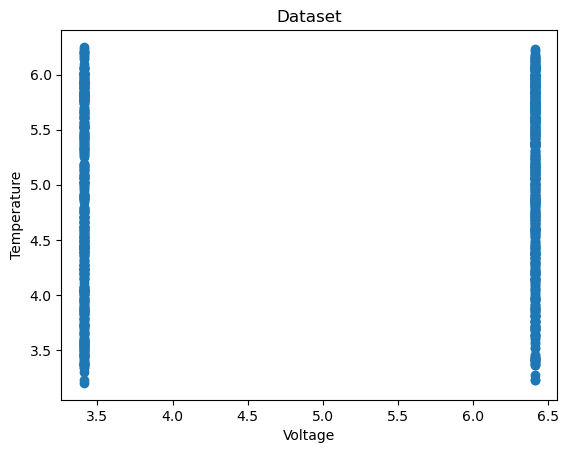

In [10]:
plt.scatter(data_x, data_y)
plt.xlabel('Voltage')  
plt.ylabel('Temperature')  
plt.title('Dataset')  
plt.show()

#### Building the model

Neural network model

In [11]:
def trainMLP(HLS):
    regr = MLPRegressor(hidden_layer_sizes = HLS,random_state=42, max_iter=500)
    regr.fit(x_train, y_train)

    # %% Get model predictions
    y_pred = regr.predict(x_test)

    # %% Compute regression metrics
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    exp_var = explained_variance_score(y_test, y_pred)

    print('')
    print('Architecture: {list}'.format(list = HLS))
    print("Mean Squared Error: {:.3f}".format(mse))
    print("Mean Absolute Percentage Error: {:.1f}%".format(mape*100))
    print("Explained Variance Score: {:.3f}".format(exp_var))

In [14]:
Architectures = [[5],[5,5],[10],[10,20],[20,20]]

for i in Architectures: trainMLP(i)


Architecture: [5]
Mean Squared Error: 0.606
Mean Absolute Percentage Error: 14.1%
Explained Variance Score: 0.035

Architecture: [5, 5]
Mean Squared Error: 0.604
Mean Absolute Percentage Error: 14.1%
Explained Variance Score: 0.035

Architecture: [10]
Mean Squared Error: 1.273
Mean Absolute Percentage Error: 18.8%
Explained Variance Score: -1.022

Architecture: [10, 20]
Mean Squared Error: 0.605
Mean Absolute Percentage Error: 14.2%
Explained Variance Score: 0.033

Architecture: [20, 20]
Mean Squared Error: 0.607
Mean Absolute Percentage Error: 14.2%
Explained Variance Score: 0.032


/Users/alexandregoncalves/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
